***
<div style="text-align:center">
<h1>Projet</h1>
<h1>Job market</h1>
</div> 

***

###  <font color='green'>**Cursus concerné**</font> : Data Engineer
###  <font color='green'>**Date**</font> : 2023/2024
***


###  <font color='green'>Contexte du projet</font>

>Le projet Job market consiste principalement à adapter et à optimiser la recherche d'emploi (étudiants, salariés en reconversion professionnelle), tout en prenant en compte les éléments clé permettant une analyse précise et factuelle du marché du travail tout en s'adaptant aux différents changements impactant ce dernier. En résumé, le projet consiste à créer une corrélation entre le demandeur d'emploi et la réalité du marché. (compétence, salaire, type de contrat...).
>
>Dans le cadre du projet Job market, les différentes étapes de ce dernier sont définis et détailler dans ce document, à savoir :
>
>1- Objectif du projet
>
>2- Analyse de la donnée brute
>
>>2.1- API Themuse (df_themuse)
>>
>>2.2- API Adzuna (df_adzuna)
>>
>>2.3- Tableau comparatif
>>
>>2.4- Partie Web scrapping 
>
>3- Identifier les problématiques
>
>4- Définir une problématique précise
>
>5- Librairies utilisées


###  <font color='green'>1-  Objectif du projet</font>

>Mettre en place une solution permettant aux etudiants, salariés en reconversion professionnelle de recueillir des données sur le marché du travail et d’identifier les tendances émergentes en termes de demandes d’emploi, salaire moyen et de compétences requises. 


###  <font color='green'>2-  Analyse de la donnée brute</font>

>Dans la partie analyse, on va afficher et visualiser deux échantillons de données avec pandas sous forme de dataframes ci-dessous, pour avoir un aperçu de la qualité de données obtenue.
>
>Cette analyse nous permet de faire la comparaison entre les deux échantillons de données en provenance de deux sources différentes. (API adzuna et API themuse).
>
>En outre, cette étude permet d'analyser la qualité et la fiabilité de la donnée pour chaque site.



###  <font color='green'>2.1-  API Themuse (df_themuse)</font>

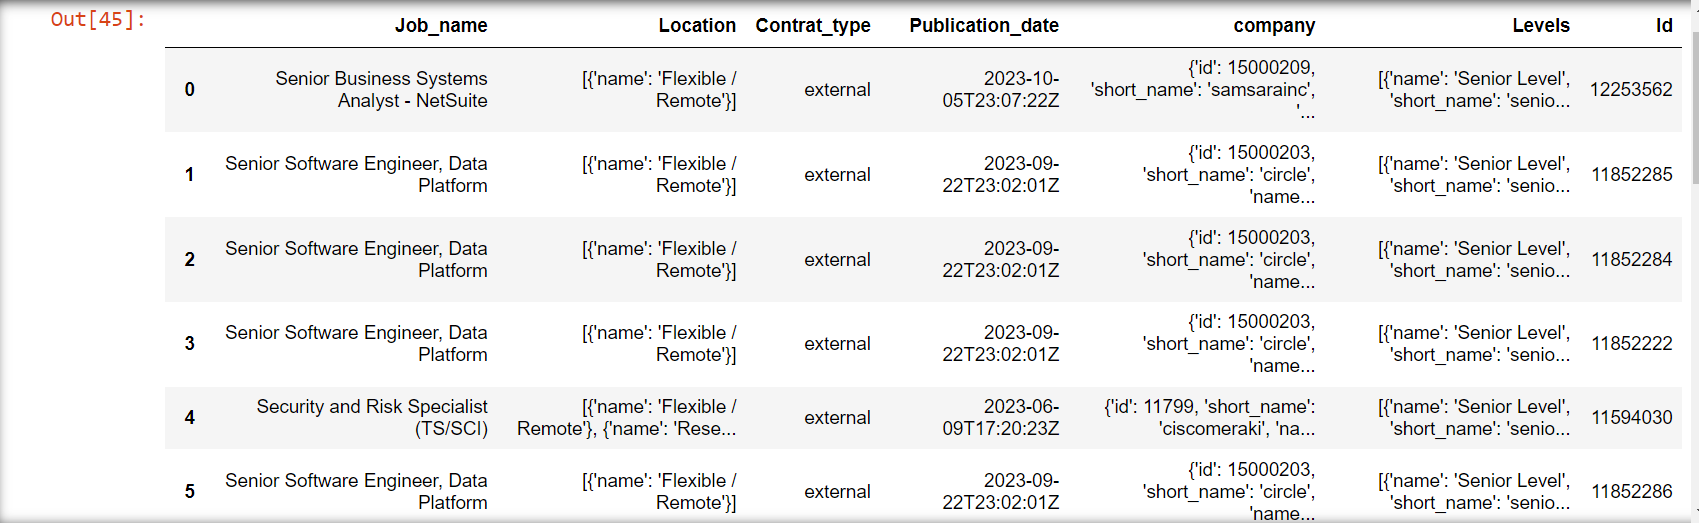

###  <font color='green'>2.2-  API Adzuna (df_adzuna)</font>

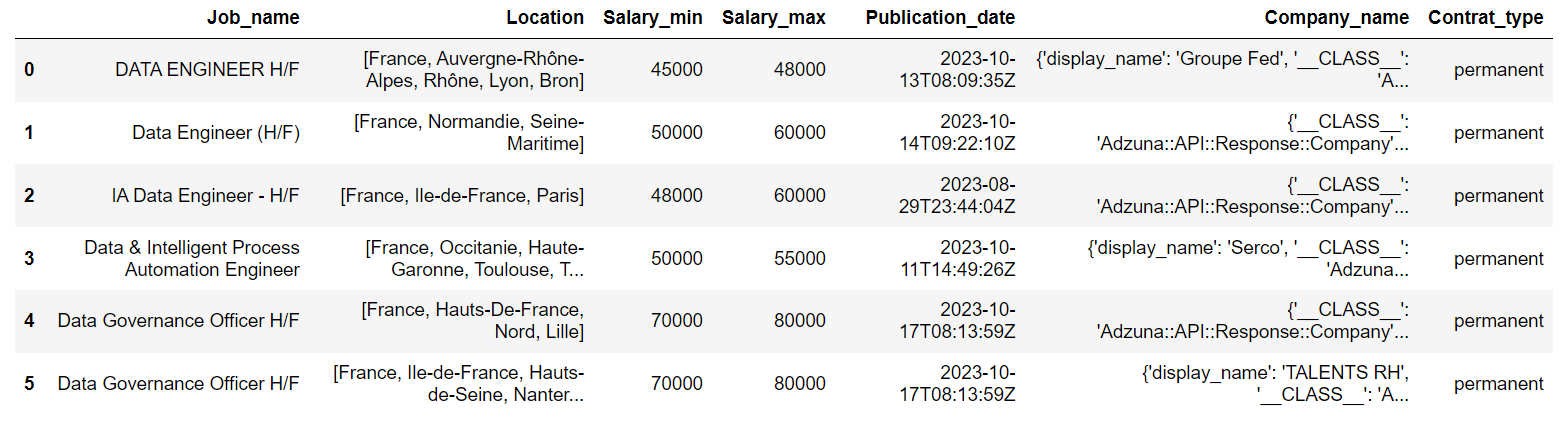

>Au préalable, on note que l'API adzuna génère plus de données que l'API themuse (voir le "tableau comparatif" ci-dessous).
>
>Dans un second temps, on procède à l'analyse de données récupérées avec l'API themuse :
>
>
>>- Dans les colonnes 'Location', 'Compagny' et 'Levels', les données sont composées de plusieurs informations non traitées, à titre d'exemple la colonne 'Levels': [{'name': 'Senior Level', 'short_name': 'senior'}] dans ce cas il est necessaire d'utiliser des technique de data cleaning pour les rendre comprehensible et facilement exploitable.
>>
>>- La variable 'Publication_date'. Il y a une erreur de formatage : la date est de format string, si nécessaire, on peut procéder à la transformation de la donnée en format date.
>>
>>- La variable 'Contract_type' est une donnée ambiguë : un manque de compréhension claire de la signification de la donnée peut nous amener à stocker des informations incorrectes, à titre d'exemple dans le site themuse, on note des valeurs "external" pour chaque poste, ce qui peut signifier que le poste est ouvert au freelance et/ou à la sous-traitance.
>>
>>- Le site themuse n’expose pas les données concernant les compétences requises par le biais d'une API consommable.(possibilité d'utiliser du web scraping)
>
>Ensuite, on procède à l'analyse de données obtenues de l'API adzuna :
>
>>- Dans les colonnes 'Location' et 'Compagny', les données sont composées de plusieurs informations non traitées, à titre d'exemple la colonne 'company': {'__CLASS__': 'Adzuna::API::Response::Company', 'display_name': 'TALENTS RH'} dans ce cas, il est necessaire d'utiliser des technique de data cleaning pour les rendre comprehensible et facilement exploitable.
>>
>>- La variable 'Publication_date'. Il y a une erreur de formatage : la date est de format string.
>>
>>- Le site adzuna n’expose pas les données concernant les compétences requises par le biais d’une API consommable.
>
>En dernier, afin d'obtenir les données "compétence requise", on peut opter pour l'utilisation du web scraping (se referer à la partie Web scraping ci-dessous) en adaptant cette méthode pour chaque site, voir pour chaque poste de chaque site.
>
>Néanmoins, il n'est pas exclu qu'on rencontre une difficulté sur certains types de données relative à un poste qui ne sont pas faciles à exploiter, du fait qu'elles soient difficiles à cibler par conséquent à extraire.

  


###  <font color='green'>2.3-  Tableau comparatif</font>

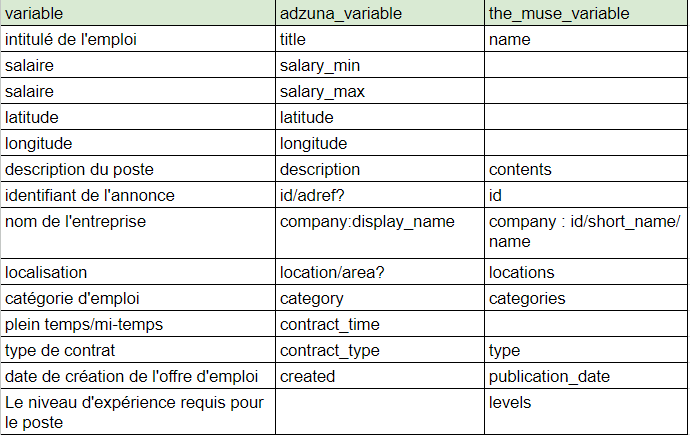

### <font color='green'>2.3-  Partie web scraping </font>

>Au vu de l'absence des données ' compétences requises ' dans les résultats obtenus via les APIs themuse et adzuna, on peut opter pour l'utilisation du web scraping sur les URL de redirection qui décrit chaque poste. 

In [53]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

url_adzuna = 'https://www.adzuna.fr/details/4283776170?utm_medium=api&utm_source=616ca7d5'
page_adzuna = urlopen(url_adzuna)
bs_adzuna = bs(page_adzuna,'html.parser')
# bs_imbd.prettify().splitlines()[0:30]
# bs_adzuna

In [54]:
techno = bs_adzuna.findAll('ul')[:] 
techno[1].text

"Python, Tensorflow, PyTorch, Keras, Pandas, SQL/NoSQL, Linux, Github, Cloud Platforms (AWS, Azure, GCP)Solide expérience de la production d'APIConnaissance en développement d'API pour solutions de machine learning (OpenAI, PaLM, Bedrock..) et éventuellement de solutions open source (StableLM, Mosaic MPT, Open Vicuna..)"

###  <font color='green'>3-  Identifier les problématiques</font>

>Les problèmes de qualité les plus courants rencontrés dans les ensembles de données recoltées à travers les deux APIs themuse et adzuna :
>
>1-Données incorrectes :
>>    - Données ambiguës : Un manque de compréhension claire de la signification de la donnée peut nous amener à stocker des informations incorrectes, à titre d'exemple dans le site themuse, la colonne 'contract_type', on note des valeurs "external" pour chaque poste, ce qui peut signifier que le poste est ouvert aux freelance et/ou à la sous-traitance .
>   
>2-Doublons : Une possiblité de stocker plusieurs enregistrements appartenant à la même entité en provenance de deux sites diffrents (themuse et adzuna).
>
>3-Données incomplètes 
>
>4-Formats et modèles incohérents 
>
>5-Valeurs manquantes 


###  <font color='green'>4-  Définir une problématique précise</font>

> Identifier les données pertinentes permettant d'avoir une visibilité factuelle sur la tendance du marché à l'instant t.

###  <font color='green'>5-  Librairies utilisées </font>

requests, urlopen, pandas, BeautifulSoup.